### MIE370 Project 3 --- Linear Regression
**Deadline: Nov 8th, 9PM [The deadline is firm and will be enforced strictly. Plan ahead and submit hours before the deadline to avoid the risk of lateness penalty.]**

# Project 3 [100 Marks]

The goal of this project is to design a mathematical model that predicts the control action on the ailerons (the small hinged sections on the outboard portion of a wing) of an aircraft, see image below.

For this purpose, we are going to use the [ailerons](https://www.dcc.fc.up.pt/~ltorgo/Regression/ailerons.html) dataset containing 13,750 instances and 40 continuous features describing the status of a F16 aircraft. The goal is to predict the `goal` column, which is the control actions on the ailerons.

Demonstration of Ailerons: ([image from NASA](https://www.grc.nasa.gov/www/k-12/VirtualAero/BottleRocket/airplane/alr.html))

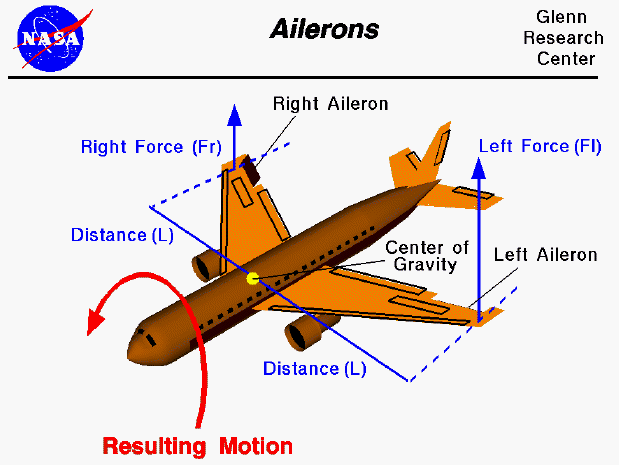

 ## Part 1: Getting Started [10 Marks]

 The given code downloads the csv file for the ailerons dataset.

1. Read the CSV file as a Pandas DataFrame, call it `df` and print the DataFrame. **[2]**
2. Prepare your dataset as follows: **[6]**
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=1`. **[2]**
*   Keep the numerical features only. Then, standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'. **[2]**
*   Insert a first column of all $1$s in both the training and validation data sets.**[2]**
3. Explain why we should not insert the column of $1$s prior to standardization. **[2]**

In [ ]:
!pip install wget

In [ ]:
# Download the dataset
import wget
wget.download('https://raw.githubusercontent.com/Sabaae/Dataset/main/Ailerons.csv')

1.

In [3]:
### YOUR CODE HERE ###
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import scipy
import scipy.linalg
from sklearn.metrics import mean_squared_error as mse
import sklearn

In [91]:
# read the csv as df
df = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/Ailerons.csv',
)
display(df)

,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se,goal
0,2,-56,-0.33,-0.09,0.90,0.2,-11,12,0.004,-0.1,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.032,-0.0009
1,470,-39,0.02,0.12,0.39,-0.6,-12,8,0.009,-1.6,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.034,-0.0011
2,165,4,0.14,0.14,0.78,0.4,-11,-9,-0.003,-0.2,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1.0,0.034,-0.0012
3,-113,5,-0.12,0.11,1.06,0.6,-10,-7,-0.008,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.033,-0.0011
4,-411,-21,-0.17,0.07,1.33,-0.6,-11,0,0.002,0.1,...,0.0,0.0,0.0,0.0,0.0,-0.002,0.0,0.9,0.032,-0.0008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,399,-22,0.17,0.20,0.36,-0.2,-9,-3,0.010,-3.9,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.8,0.027,-0.0008
13746,237,-6,0.26,0.10,0.52,0.7,-8,-8,-0.004,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.8,0.027,-0.0010
13747,-148,-3,-0.37,0.09,0.89,0.7,-8,-7,-0.013,-0.2,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.7,0.026,-0.0006
13748,-237,-11,-0.47,-0.16,0.90,-0.4,-9,8,0.010,2.8,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.7,0.023,-0.0005


2.

In [92]:
y = pd.DataFrame(df["goal"])
y

,goal
0,-0.0009
1,-0.0011
2,-0.0012
3,-0.0011
4,-0.0008
...,...
13745,-0.0008
13746,-0.0010
13747,-0.0006
13748,-0.0005


In [95]:
X = df.drop(columns=['goal'])
X

,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime7,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se
0,2,-56,-0.33,-0.09,0.90,0.2,-11,12,0.004,-0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.032
1,470,-39,0.02,0.12,0.39,-0.6,-12,8,0.009,-1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.034
2,165,4,0.14,0.14,0.78,0.4,-11,-9,-0.003,-0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1.0,0.034
3,-113,5,-0.12,0.11,1.06,0.6,-10,-7,-0.008,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.033
4,-411,-21,-0.17,0.07,1.33,-0.6,-11,0,0.002,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.002,0.0,0.9,0.032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,399,-22,0.17,0.20,0.36,-0.2,-9,-3,0.010,-3.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.8,0.027
13746,237,-6,0.26,0.10,0.52,0.7,-8,-8,-0.004,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.8,0.027
13747,-148,-3,-0.37,0.09,0.89,0.7,-8,-7,-0.013,-0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.7,0.026
13748,-237,-11,-0.47,-0.16,0.90,-0.4,-9,8,0.010,2.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.7,0.023


In [87]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)
display(X_train.head(), X_valid.head(), y_train.head(), y_valid.head())

,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime7,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se
13066,312,-9,0.02,0.16,0.27,0.6,-12,0,0.011,-4.4,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.019
12973,-122,-22,0.43,0.10,0.85,-0.2,-19,1,0.009,0.3,...,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.026
849,446,31,-0.38,0.10,0.15,1.6,-12,-5,-0.021,0.3,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.020
10361,-33,-25,0.59,0.28,0.62,0.7,-14,-16,-0.033,-1.7,...,-0.002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.021
13535,-110,-8,0.62,0.17,0.76,-1.0,-16,-10,0.003,0.8,...,-0.002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.024


,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime7,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se
12870,-167,-2,0.14,-0.01,0.68,1.0,-12,-3,-0.019,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.018
11578,136,1,0.16,0.01,0.40,1.5,-11,4,-0.005,-0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.018
2255,298,11,0.18,0.08,0.24,0.2,-11,4,0.005,-0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.019
12386,452,-64,0.48,-0.05,0.09,-1.0,-9,3,0.005,1.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.017
7083,-31,13,-0.33,0.06,0.56,0.7,-7,-6,-0.006,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.019


,goal
13066,-0.0008
12973,-0.0020
849,-0.0011
10361,-0.0017
13535,-0.0012


,goal
12870,-0.0009
11578,-0.0010
2255,-0.0008
12386,-0.0008
7083,-0.0006


In [80]:
print(len(X_train), len(X_valid))

11000 2750


In [97]:
# keep the numerical feature only
num_features = X_train.select_dtypes(include=[np.number]).columns

In [99]:
X_train = X_train[num_features]
X_valid = X_valid[num_features]

# std the data manually
mu = X_train.mean() # on row
std = X_train.std() # on row

# std training data
X_train_num_std = (X_train - mu) / std
# std val data using training data's mu and std
X_valid_num_std = (X_valid - mu) / std

display(X_train_num_std.head(), X_valid_num_std.head())

,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime7,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se
13066,1.238519,0.143718,0.042118,0.828065,-1.141012,0.550510,-0.231595,0.092103,0.908723,-3.833663,...,0.158794,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,-0.626431,-0.429921
12973,-0.425772,-0.360543,1.389098,0.322942,0.702887,-0.274730,-1.924958,0.187781,0.757496,0.313847,...,1.953993,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,0.391328,0.576461
849,1.752379,1.695289,-1.272009,0.322942,-1.522509,1.582061,-0.231595,-0.386287,-1.510909,0.313847,...,0.158794,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,-0.117551,-0.286152
10361,-0.084477,-0.476911,1.914749,1.838312,-0.028315,0.653665,-0.715413,-1.438745,-2.418271,-1.451051,...,-3.431605,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,-0.117551,-0.142383
13535,-0.379754,0.182507,2.013308,0.912253,0.416765,-1.099971,-1.199231,-0.864677,0.303815,0.755072,...,-3.431605,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,0.391328,0.288923


,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime7,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se
12870,-0.598336,0.415243,0.436356,-0.603117,0.162434,0.963131,-0.231595,-0.194931,-1.359682,0.578582,...,0.158794,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,-0.626431,-0.573690
11578,0.563600,0.531611,0.502062,-0.434743,-0.727725,1.478906,0.010314,0.474815,-0.301093,-0.039133,...,0.158794,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,-0.626431,-0.573690
2255,1.184833,0.919503,0.567769,0.154568,-1.236386,0.137890,0.010314,0.474815,0.455042,-0.480357,...,0.158794,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,-0.626431,-0.429921
12386,1.775387,-1.989692,1.553364,-0.939866,-1.713257,-1.099971,0.494132,0.379137,0.455042,1.019806,...,0.158794,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,-0.626431,-0.717459
7083,-0.076807,0.997082,-1.107743,-0.013807,-0.219063,0.653665,0.977950,-0.481965,-0.376706,0.049112,...,0.158794,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,-0.626431,-0.429921


In [100]:
# insert 1st cols all of 1s for both train and val
# one_train = np.ones((X_train_num_std.shape[0], 1))
# one_valid = np.ones((X_valid_num_std.shape[0], 1))
X_train_num_std.insert(0, "bias", 1)
X_valid_num_std.insert(0, "bias", 1)
# X_train_num_std_1s = np.hstack((one_train, X_train_num_std))
# X_valid_num_std_1s = np.hstack((one_valid, X_valid_num_std))
display(X_train_num_std.head(), "\nvalid:\n", X_valid_num_std.head())

,bias,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,...,diffSeTime7,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se
13066,1,1.238519,0.143718,0.042118,0.828065,-1.141012,0.550510,-0.231595,0.092103,0.908723,...,0.158794,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,-0.626431,-0.429921
12973,1,-0.425772,-0.360543,1.389098,0.322942,0.702887,-0.274730,-1.924958,0.187781,0.757496,...,1.953993,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,0.391328,0.576461
849,1,1.752379,1.695289,-1.272009,0.322942,-1.522509,1.582061,-0.231595,-0.386287,-1.510909,...,0.158794,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,-0.117551,-0.286152
10361,1,-0.084477,-0.476911,1.914749,1.838312,-0.028315,0.653665,-0.715413,-1.438745,-2.418271,...,-3.431605,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,-0.117551,-0.142383
13535,1,-0.379754,0.182507,2.013308,0.912253,0.416765,-1.099971,-1.199231,-0.864677,0.303815,...,-3.431605,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,0.391328,0.288923


'\nvalid:\n'

,bias,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,...,diffSeTime7,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se
12870,1,-0.598336,0.415243,0.436356,-0.603117,0.162434,0.963131,-0.231595,-0.194931,-1.359682,...,0.158794,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,-0.626431,-0.573690
11578,1,0.563600,0.531611,0.502062,-0.434743,-0.727725,1.478906,0.010314,0.474815,-0.301093,...,0.158794,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,-0.626431,-0.573690
2255,1,1.184833,0.919503,0.567769,0.154568,-1.236386,0.137890,0.010314,0.474815,0.455042,...,0.158794,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,-0.626431,-0.429921
12386,1,1.775387,-1.989692,1.553364,-0.939866,-1.713257,-1.099971,0.494132,0.379137,0.455042,...,0.158794,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,-0.626431,-0.717459
7083,1,-0.076807,0.997082,-1.107743,-0.013807,-0.219063,0.653665,0.977950,-0.481965,-0.376706,...,0.158794,-0.009535,0.168824,0.006847,0.152214,0.017358,0.158775,0.017164,-0.626431,-0.429921


3.

If we insert the column 1s before the standardization, it would be involved in the calculation of mean and std. However, the 1s we add are the bias term other than the features, if they calculated together with the feature's value, we will get different mean and std and mistaken the standardization. On the other hand, if we add 1s before standardization, their values would not remain as 1 after the standardization, and then they are not the bias term anymore.

## Part 2 - Linear Regression Using Direct Solution [7 Marks]

Implement the direct solution of the linear regression problem on the training set. **[5]**

**Note: You should use scipy.linalg.inv to perform the inversion, as numpy.linalg.inv may cause an error.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[2]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

w = (XT · X)^-1 · (XT · y)

In [101]:
### YOUR CODE HERE ###

# direct soln of linear regression
x_tra = X_train_num_std.values # for convient
y_tra = y_train.values
x_val = X_valid_num_std.values
y_val = y_valid.values

W = np.dot(scipy.linalg.inv(np.dot(x_tra.T, x_tra)), np.dot(x_tra.T, y_tra))
y_pred_train = np.dot(x_tra, W)

In [102]:
def RMSE(y_pred, y):
    return np.sqrt(mse(y_pred, y))

In [106]:
# rmse for train
rmse_train = RMSE(y_pred_train, y_tra)
print(f"rmse for training dataset: {rmse_train}")

# rmse for val
y_pred_val = np.dot(x_val, W)
rmse_valid = RMSE(y_pred_val, y_val)
print(f"rmse for validation dataset: {rmse_valid}")


rmse for training dataset: 0.0001757262010019119
rmse for validation dataset: 0.00018042850458929057


## Part 3 - Full Batch Gradient Descent [20 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is, 
 $$ 
 w_t = w_{t-1} - \alpha~g_t 
 $$ where $\alpha$ is the learning rate and 
 $g_t$ is your gradient, computed on the entire data.

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges.

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part.

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).
  Be sure to compute the gradients yourself! **[5]**

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. **[3]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[5]**

    **Hint**: Initialize your weights with small random numbers (<$0.001$) & please set **np.random.seed(100)**

* Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[2]**

In [107]:
import matplotlib.pyplot as plt

In [108]:
x_tra.shape

(11000, 41)

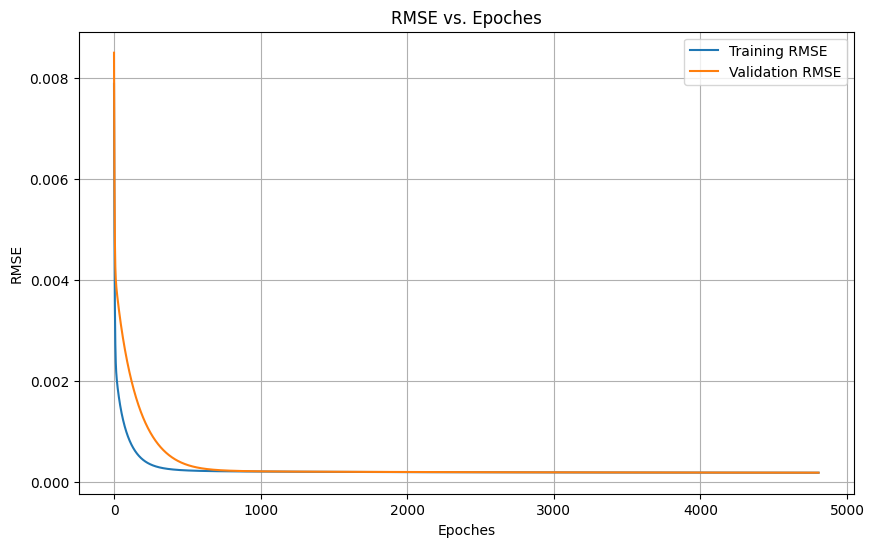

--- Total Training Time: 3.569706916809082 (s) ---


In [109]:
import time
start_time = time.time() ## Records current time
np.random.seed(2)

## GD Script ##

# learning rate
lr = 0.01
# init weights !!! small enough (< 0.001)
w = np.random.random(size=(1, x_tra.shape[1])) * 0.001
# converage threshold 
CT = rmse_valid * 1.001
rmse_tra_arr = []  # array to store rmse
rmse_val_arr = []
curr_rmse_grad = 1000000000 # init rmse for while loop
epoch = 0
epoch_arr = []

# iterate until rmseGD <= CT
while curr_rmse_grad > CT:
    y_pred_train = np.dot(x_tra, w.T).reshape(-1,1)
    y_pred_val = np.dot(x_val, w.T).reshape(-1,1)
    
    rmse_tra = RMSE(y_pred_train, y_tra)
    rmse_val = RMSE(y_pred_val, y_val)
    rmse_tra_arr.append(rmse_tra)
    rmse_val_arr.append(rmse_val)
    
    gradient = (1/len(y_train) * np.dot(x_tra.T, (y_pred_train-y_tra))).reshape(1,-1)
    w = w - lr * gradient
    curr_rmse_grad = rmse_val
    
    # # debug
    # if epoch % 200 == 0:
    #     print(curr_rmse_grad)
    
    epoch_arr.append(epoch)
    epoch += 1
    
# plt 
plt.figure(figsize=(10, 6))
plt.plot(epoch_arr, rmse_tra_arr, label="Training RMSE")
plt.plot(epoch_arr, rmse_val_arr, label="Validation RMSE")
plt.xlabel("Epoches")
plt.ylabel("RMSE")
plt.title("RMSE vs. Epoches")
plt.legend()
plt.grid(True)
plt.show()

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

- Both the RMSE (error) for validation and training dataset decreased rapidly as the number of epoched increase in early stage. After around 800 epoches, both RMSEs stablizes in a low value. Since the training and validation RMSE is very close after converge and remained like this until the end, there is no evidence showing the model is either overfitting or underfitting.

- The difference between epoch and iteration in the Gradient descent alogrithm (SGD/mini-batch) is that iteration represents a single update to the model's parameters using **one** batch of data, where epoch represents a complete iteration over the entire traning dataset, which may included multiple iterations in one epoch (depends on mini-batch size).

## Part 4 - Mini-batch and Stochastic Gradient Descent [25 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[7]**

The inputs of that function are:
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays:
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes:
* use **np.random.seed(100)** before setting the initial (random) weights

  ```
  def mini_batch_gd(YOUR_INPUTS):
    np.random.seed(100)

    ### YOUR CODE HERE ###
    
    return YOUR_OUTPUTS
  ```

* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged.
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`.

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[3]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[3]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[2]**

Describe your findings, including the main takeaways from each of your plots. **[5]**

In [110]:
### YOUR CODE HERE ###

def mini_batch_gd(X_train, X_valid, y_train, y_valid, batch_size, CT, lr=0.01):
    # set random seed
    np.random.seed(100)
    
    # init vars
    # mini batch
    mini_X_train = 0
    # final weight after training
    final_w = None
    # init weights 
    # used 0.02 before
    w = np.random.random(size=(1, X_train.shape[1])) * 0.001
    # train RMSE array
    rmse_train_arr = []
    # val RMSE array
    rmse_val_arr = []
    # start and current time 
    start_time = 0
    current_time = 0
    # elapsed time array
    elapsed_time = 0
    elapsed_time_arr = []
    # epoches
    epoch = 0
    epoch_arr = []
    # current gradient rmse
    curr_rmse_grad = float('inf')
    # num times in a row rmse is larger than previous
    large_in_row = 0
    
    # iterate until rmseGD <= CT
    while curr_rmse_grad > CT:
            
        # record the time
        start_time = time.time() 
        
        # Shuffle training data at the start of each epoch
        permuted_indices = np.random.permutation(X_train.shape[0])
        X_train = X_train[permuted_indices]
        y_train = y_train[permuted_indices]
        
        # Divided X train into different batch sizes
        num_batches = int(np.ceil(X_train.shape[0] / batch_size))
        
        for i in range(num_batches):
            # Define batch start and end indices
            start_idx = i * batch_size
            end_idx = min((i + 1) * batch_size, X_train.shape[0])
            mini_X_train = X_train[start_idx: end_idx]
            mini_y_train = y_train[start_idx:end_idx]
        
            # pred
            y_pred_train = np.dot(mini_X_train, w.T).reshape(-1,1)
            # y_pred_val = np.dot(X_valid, w.T).reshape(-1,1)
            
            # cal gradient
            gradient = (1 / len(mini_y_train) * np.dot(mini_X_train.T, (y_pred_train - mini_y_train))).reshape(1,-1)
            
            # update weight
            w = w - lr * gradient
        
        # record final weight    
        final_w = w
        
        # Predict for the entire training and validation set
        y_pred_train_full = np.dot(X_train, w.T).reshape(-1, 1)
        y_pred_val = np.dot(X_valid, w.T).reshape(-1,1)
            
        # calculate rmse
        rmse_tra = RMSE(y_pred_train_full, y_train)
        rmse_val = RMSE(y_pred_val, y_valid)
        
        # record rmse
        rmse_train_arr.append(rmse_tra)
        rmse_val_arr.append(rmse_val)
        
        curr_rmse_grad = rmse_val  # track current rmse
            
        # update time
        current_time = time.time()
        elapsed_time += current_time - start_time
        elapsed_time_arr.append(elapsed_time)  # track time spent for each epoch
        
        # # debug
        # if epoch % 200 == 0:
        #     print(curr_rmse_grad)
        
        # update epoch
        epoch += 1  # increment epoch
        epoch_arr.append(epoch)
        
        # if do not converage and getting larger ang larger, stop
        # let's set # of time rmse is larger than previous in a row, then stop: 20
        if epoch > 1 and curr_rmse_grad > rmse_val_arr[-2]:
            large_in_row += 1
        # else, reset
        else:
            large_in_row = 0
        
        if large_in_row >= 20:
            print(f"batch size {batch_size} not converging!")
            break
        
    # Return final weight, RMSE, and elapsed time arrays
    return final_w, rmse_train_arr, rmse_val_arr, elapsed_time_arr

diff values for mini batch size (>= 5 converging)
let's try 2, 32, 48, 99, 128, 256

In [111]:
CT = rmse_valid * 1.001

In [112]:
# batch_size = 2
batch_size_2 = mini_batch_gd(x_tra, x_val, y_tra, y_val, batch_size=2, CT=CT)
print(f"final weight: {batch_size_2[0]}")
print(f"training RMSE: {batch_size_2[1][:5]}")
print(f"valildation RMSE: {batch_size_2[2][:5]}")
print(f"first 5 training time: {batch_size_2[3][:5]} \
    \nlast 3 training time: {batch_size_2[3][-3:]}")

batch size 2 not converging!
final weight: [[ 2.06978529e+112  1.94692569e+111 -6.00046806e+109 -1.23751435e+110
   1.72077493e+111  1.84763223e+111  3.13167492e+110  5.57620385e+110
   1.23837190e+111  3.29497905e+110  4.86712252e+110 -2.81867189e+111
  -2.86690600e+111 -2.72394467e+111 -2.73065646e+111 -2.73020739e+111
  -2.76396688e+111 -2.76415129e+111 -2.71360541e+111 -2.71341257e+111
  -2.69611127e+111  7.71364064e+110  8.18585756e+110  4.32514596e+111
   4.38028766e+111  2.07778923e+110 -1.03448144e+113  3.44101347e+110
  -8.82718361e+109  5.20861639e+110  2.51089538e+110  1.01497271e+111
  -1.98123397e+110  1.54838865e+111 -3.35500396e+113  1.72696062e+111
  -4.97282726e+113  1.14655062e+111 -6.31312970e+113  8.21631577e+111
   7.02705103e+111]]
training RMSE: [545.987053248615, 85516944.26836312, 13845660977615.62, 3.3583606362193034e+18, 5.910887464282327e+22]
valildation RMSE: [124.55755319696641, 55330315.00039922, 1982132129671.8542, 5.66528230158786e+16, 3.85953554352813e

In [113]:
# batch_size = 32
batch_size_32 = mini_batch_gd(x_tra, x_val, y_tra, y_val, batch_size=32, CT=CT)
print(f"final weight: {batch_size_32[0]}")
print(f"training RMSE: {batch_size_32[1][-25:]}")
print(f"valildation RMSE: {batch_size_32[2][-25:]}")
print(f"first 5 training time: {batch_size_32[3][:5]} \
    | last 3 training time: {batch_size_32[3][-3:]}")

batch size 32 not converging!
final weight: [[-4.60105894e+53  9.26497999e+51  7.53171437e+52  1.56558572e+53
  -1.36426245e+53  3.49243747e+52 -5.20603689e+52  8.43945317e+52
  -1.18445911e+52 -8.40854997e+51  4.28207470e+52 -3.48332187e+52
  -3.52386506e+52 -2.15449669e+52 -2.31031522e+52 -2.27909482e+52
  -2.73794862e+52 -1.48301762e+52 -9.77463715e+51  3.33323740e+52
   2.73574751e+52  4.65692237e+52  4.26590056e+52  1.78008987e+52
   1.08787072e+52  1.76124121e+52 -9.90337875e+54  1.03514906e+52
  -1.18872392e+53 -2.02487817e+52  5.85200438e+54 -5.58881166e+52
  -3.12793824e+55  1.27092911e+52  4.64303948e+53 -1.41054067e+52
   1.30228568e+54  1.12652713e+52  1.11883640e+54  8.18730542e+52
  -7.52222787e+51]]
training RMSE: [2.3566353651154613e+44, 9.56291004489515e+44, 2.8286399562402483e+45, 7.312238071569535e+45, 1.5873527012666106e+46, 4.159933482602261e+46, 1.865537462691731e+47, 4.801776299524373e+47, 1.4859552762871374e+48, 3.5363176457436195e+48, 7.046471097270935e+48, 1.6

In [114]:
# batch_size = 48
batch_size_48 = mini_batch_gd(x_tra, x_val, y_tra, y_val, batch_size=48, CT=CT)
print(f"final weight: {batch_size_48[0]}")
print(f"training RMSE: {batch_size_48[1][-25:]}")
print(f"valildation RMSE: {batch_size_48[2][-25:]}")
print(f"first 5 training time: {batch_size_48[3][:5]} \
    | last 3 training time: {batch_size_48[3][-3:]}")

batch size 48 not converging!
final weight: [[ 2.17025746e+04 -3.76581953e+03  1.05343400e+03  1.12659837e+03
  -5.93795758e+03 -7.63579101e+03 -2.15531534e+04  8.36196937e+03
   2.30029809e+03 -1.93639379e+04  1.43760056e+03  3.03630629e+03
   3.39690815e+03  1.28435465e+03  1.25611929e+03  1.26590448e+03
   1.47586813e+03  5.94335366e+02  9.98024680e+02 -8.07321718e+01
  -2.82776685e+01 -1.11350295e+03 -7.02237450e+02 -8.92668691e+01
   2.48704920e+02 -1.45041648e+03  1.52776825e+06  7.72055355e+02
  -9.12301223e+02 -1.85986030e+03  2.21514290e+05 -3.85760509e+03
   7.82785138e+05 -2.14828520e+02 -1.31954031e+05 -5.49614383e+02
   2.69497909e+04 -2.49764294e+02  1.07748711e+05 -2.52740994e+03
  -3.01370513e+02]]
training RMSE: [52.78056446645816, 104.48135516813788, 153.10959383602633, 234.98043944108758, 346.94873158333047, 497.7590156686162, 697.8438936119477, 1382.7366689135936, 2213.5327031892907, 3594.5407434839017, 4473.687823161261, 6440.257569940221, 14666.924160292128, 20083

seems the batch size is too small: \
lets using 256

In [115]:
# batch_size = 256
batch_size_256 = mini_batch_gd(x_tra, x_val, y_tra, y_val, batch_size=256, CT=CT)
print(f"final weight: {batch_size_256[0]}")
print(f"training RMSE: {batch_size_256[1]}")
print(f"valildation RMSE: {batch_size_256[2]}")
print(f"first 5 training time: {batch_size_256[3][:5]} \
    | last 3 training time: {batch_size_256[3][-3:]}")


final weight: [[-8.72555491e-04  5.18005430e-05  5.06530487e-06 -1.30281663e-04
   6.61651681e-05  6.31956711e-05 -8.46979017e-05  2.62752065e-04
   1.94942817e-05  3.10495029e-05  2.57222019e-05 -2.51711649e-04
  -2.72956709e-04 -3.49921511e-04 -2.60933423e-04  5.01025241e-04
   3.06953486e-04 -3.31787707e-04  3.04279894e-04 -2.37743330e-04
  -1.07608190e-04  4.00341350e-04  3.09684298e-04 -1.65145949e-04
  -3.35964037e-04  1.16171103e-05  4.90527968e-06  3.73800775e-05
   3.36542942e-06  2.11230059e-05  4.00110197e-06  2.36355165e-05
   1.45048837e-06  2.57347398e-05  7.85284883e-06  1.04804100e-05
  -4.12174550e-06  1.33390545e-06  2.48438574e-06  4.03839552e-05
   2.34601201e-04]]
training RMSE: [0.0018691346480379264, 0.001146912033457081, 0.0007659578264072595, 0.0005490639248724821, 0.000423614678175952, 0.0003478305566338595, 0.00030211217378195145, 0.00027275057922531966, 0.00025341158725298375, 0.00023989034744894205, 0.00023008125468942735, 0.00022266809227330911, 0.00021699

we will try: \
999, 512, 1024, 2048

In [116]:
# batch_size = 999
batch_size_999 = mini_batch_gd(x_tra, x_val, y_tra, y_val, batch_size=999, CT=CT)
print(f"final weight: {batch_size_999[0]}")
print(f"training RMSE: {batch_size_999[1][-5:]}")
print(f"valildation RMSE: {batch_size_999[2][-5:]}")
print(f"first 5 training time: {batch_size_999[3][:5]} \
    | last 3 training time: {batch_size_999[3][-3:]}")

final weight: [[-8.73116814e-04  5.31671892e-05  4.31813181e-06 -1.27682453e-04
   6.99579481e-05  6.46789562e-05 -8.45186701e-05  2.65765173e-04
   2.30417703e-05  3.27511167e-05  2.73366742e-05 -2.53567156e-04
  -2.74094386e-04 -3.51058868e-04 -2.61475795e-04  5.00362017e-04
   3.06621283e-04 -3.32120028e-04  3.04596677e-04 -2.37426598e-04
  -1.06391003e-04  4.01612888e-04  3.10724790e-04 -1.64111301e-04
  -3.34949301e-04  1.21146631e-05  4.64780601e-06  3.64299727e-05
   3.49942671e-06  2.10631215e-05  4.06348838e-06  2.47976516e-05
   1.49453659e-06  2.59405566e-05  7.82365537e-06  1.15636625e-05
  -3.94708133e-06  2.56972236e-06  2.43860634e-06  4.22110542e-05
   2.35630068e-04]]
training RMSE: [0.00017888210211685894, 0.0001793615956725062, 0.00017855051919452055, 0.00017847796587472275, 0.0001788186557424485]
valildation RMSE: [0.00018282260895182757, 0.00018379836102842262, 0.00018193709320749862, 0.0001809581793848466, 0.00018050224997672652]
first 5 training time: [0.00716304

In [117]:
# batch_size = 512
batch_size_512 = mini_batch_gd(x_tra, x_val, y_tra, y_val, batch_size=512, CT=CT)
print(f"final weight: {batch_size_512[0]}")
print(f"training RMSE: {batch_size_512[1][-5:]}")
print(f"valildation RMSE: {batch_size_512[2][-5:]}")
print(f"first 5 training time: {batch_size_512[3][:5]} \
    | last 3 training time: {batch_size_512[3][-3:]}")

final weight: [[-8.72481638e-04  5.22428522e-05  4.93687605e-06 -1.30170569e-04
   6.33443553e-05  6.40575901e-05 -8.41637661e-05  2.61561645e-04
   1.71660564e-05  3.09843180e-05  2.48467289e-05 -2.49386620e-04
  -2.71301663e-04 -3.48266188e-04 -2.59963592e-04  5.01905967e-04
   3.07292065e-04 -3.31449148e-04  3.03877692e-04 -2.38145474e-04
  -1.08863564e-04  3.99113489e-04  3.07997994e-04 -1.66870491e-04
  -3.37858154e-04  1.13986820e-05  4.74366508e-06  3.68413910e-05
   3.44734314e-06  2.04566314e-05  4.03203538e-06  2.30276651e-05
   1.40024673e-06  2.49523178e-05  7.82981000e-06  1.01733492e-05
  -3.93941004e-06  1.04023354e-06  2.48388396e-06  3.83707361e-05
   2.32681979e-04]]
training RMSE: [0.00017810125595917617, 0.000178163810556739, 0.00017805739060982865, 0.0001780321845765722, 0.0001780687560853354]
valildation RMSE: [0.00018085662407345366, 0.00018151110449944607, 0.00018100387871310039, 0.00018085429216161422, 0.0001804539339296105]
first 5 training time: [0.0123276710

In [118]:
# batch_size = 1024
batch_size_1024 = mini_batch_gd(x_tra, x_val, y_tra, y_val, batch_size=1024, CT=CT)
print(f"final weight: {batch_size_1024[0]}")
print(f"training RMSE: {batch_size_1024[1][-5:]}")
print(f"valildation RMSE: {batch_size_1024[2][-5:]}")
print(f"first 5 training time: {batch_size_1024[3][:5]} \
    | last 3 training time: {batch_size_1024[3][-3:]}")

final weight: [[-8.72595610e-04  5.26601500e-05  4.95220038e-06 -1.30201269e-04
   6.10519074e-05  6.44936426e-05 -8.44141342e-05  2.60871234e-04
   1.54541419e-05  3.07096053e-05  2.38459260e-05 -2.47936821e-04
  -2.70256250e-04 -3.47220760e-04 -2.59432293e-04  5.02418105e-04
   3.07555860e-04 -3.31185353e-04  3.03694454e-04 -2.38328670e-04
  -1.09549958e-04  3.98433081e-04  3.06949053e-04 -1.67904694e-04
  -3.39004136e-04  1.13678911e-05  4.75638577e-06  3.66125538e-05
   3.41254262e-06  2.01772712e-05  4.04291935e-06  2.28504557e-05
   1.36612074e-06  2.47168785e-05  7.71148831e-06  9.55053001e-06
  -4.05575521e-06  8.88695758e-07  2.45218624e-06  3.66787393e-05
   2.31540249e-04]]
training RMSE: [0.00017795310097663364, 0.0001779380261048173, 0.00017792012426446493, 0.00017792258455066637, 0.0001779070808048712]
valildation RMSE: [0.00018097869075867445, 0.00018093262133774614, 0.0001806381613611035, 0.0001809622475472768, 0.00018052898656976453]
first 5 training time: [0.008232593

In [119]:
# batch_size = 2048
batch_size_2048 = mini_batch_gd(x_tra, x_val, y_tra, y_val, batch_size=2048, CT=CT)
print(f"final weight: {batch_size_2048[0]}")
print(f"training RMSE: {batch_size_2048[1][-5:]}")
print(f"valildation RMSE: {batch_size_2048[2][-5:]}")
print(f"first 5 training time: {batch_size_2048[3][:5]} \
    | last 3 training time: {batch_size_2048[3][-3:]}")

final weight: [[-8.72650273e-04  5.29456449e-05  5.07170441e-06 -1.30339427e-04
   6.16939700e-05  6.45804555e-05 -8.43543285e-05  2.61181967e-04
   1.58016887e-05  3.07039841e-05  2.40804781e-05 -2.48316502e-04
  -2.70531472e-04 -3.47496024e-04 -2.59609665e-04  5.02262808e-04
   3.07451638e-04 -3.31289585e-04  3.03781873e-04 -2.38241255e-04
  -1.09333039e-04  3.98647118e-04  3.07092013e-04 -1.67757823e-04
  -3.39019151e-04  1.12252243e-05  4.78029320e-06  3.66495527e-05
   3.44329746e-06  2.03816408e-05  4.04904861e-06  2.28657592e-05
   1.37035291e-06  2.47134770e-05  7.78297135e-06  9.89044167e-06
  -4.04005866e-06  9.21087839e-07  2.50271131e-06  3.68077069e-05
   2.31505639e-04]]
training RMSE: [0.0001779435904454259, 0.00017794229160721518, 0.0001779386858532434, 0.0001779259101095403, 0.00017792738843927123]
valildation RMSE: [0.00018074406313757057, 0.00018064064158435734, 0.0001809067463634963, 0.00018074002109501078, 0.00018059735762698565]
first 5 training time: [0.008007526

In [120]:
# add batch size at the end of batches for plotting
batch_size_256 = batch_size_256 + (256,)
batch_size_999 = batch_size_999 + (999,)
batch_size_512 = batch_size_512 + (512,)
batch_size_1024 = batch_size_1024 + (1024,)
batch_size_2048 = batch_size_2048 + (2048,)

In [121]:
# plot the graph
def plot_mini_batch(batch1, batch2, batch3, batch4, batch5):
    batch_list = [batch1, batch2, batch3, batch4, batch5]
    
    # train and val RMSE vs. epoch
    plt.figure(figsize=(12, 8))
    for batch in batch_list:
        epoch_arr = range(len(batch[1]))
        rmse_tra_arr = batch[1]
        rmse_val_arr = batch[2]
        batch_size = batch[-1]
        plt.plot(epoch_arr, rmse_tra_arr, label=f"Training RMSE (Batch Size: {batch_size})")
        plt.plot(epoch_arr, rmse_val_arr, linestyle="--", label=f"Validation RMSE ( Batch Size: {batch_size})")
    plt.xlabel("Epoches")
    plt.ylabel("RMSE")
    plt.title("Training and Validation RMSE vs. Epoch for Converging Batch Sizes")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # train and val RMSE vs. time
    plt.figure(figsize=(12, 8))
    for batch in batch_list:
        elapse_time_arr = batch[3]
        rmse_tra_arr = batch[1]
        rmse_val_arr = batch[2]
        batch_size = batch[-1]
        plt.plot(elapse_time_arr, rmse_tra_arr, label=f"Training RMSE (Batch Size: {batch_size})")
        plt.plot(elapse_time_arr, rmse_val_arr, linestyle='--', label=f"Validation RMSE (Batch Size: {batch_size})")
    plt.xlabel("Time (seconds)")
    plt.ylabel("RMSE")
    plt.title("Training and Validation RMSE vs. Time for Converging Batch Sizes")
    plt.legend()
    plt.grid(True)
    plt.show()    
    
    # total training time vs. batch size
    plt.figure(figsize=(10, 6))
    for batch in batch_list:
        total_time = batch[3][-1]
        batch_size = batch[-1]
        plt.plot(batch_size, total_time, marker="o", label=f"Batch Size: {batch_size}")
    plt.xlabel("Batch Size")
    plt.ylabel("Total Training Time (seconds)")
    plt.title("Total Training Time vs. Batch Size")
    plt.legend()
    plt.grid(True)
    plt.show() 
    
        

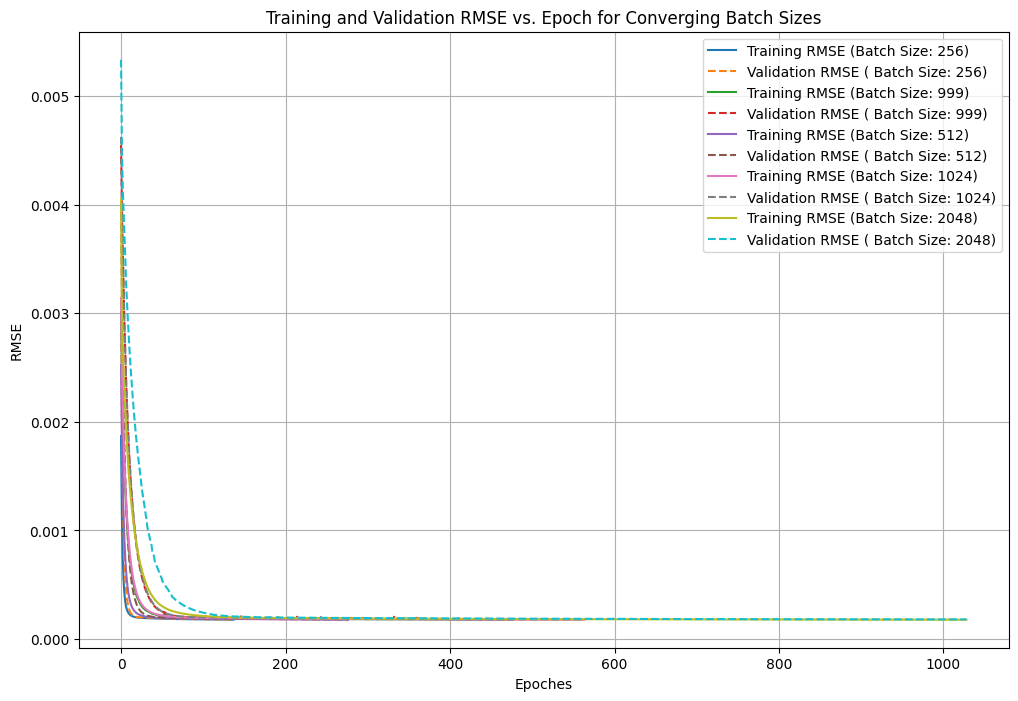

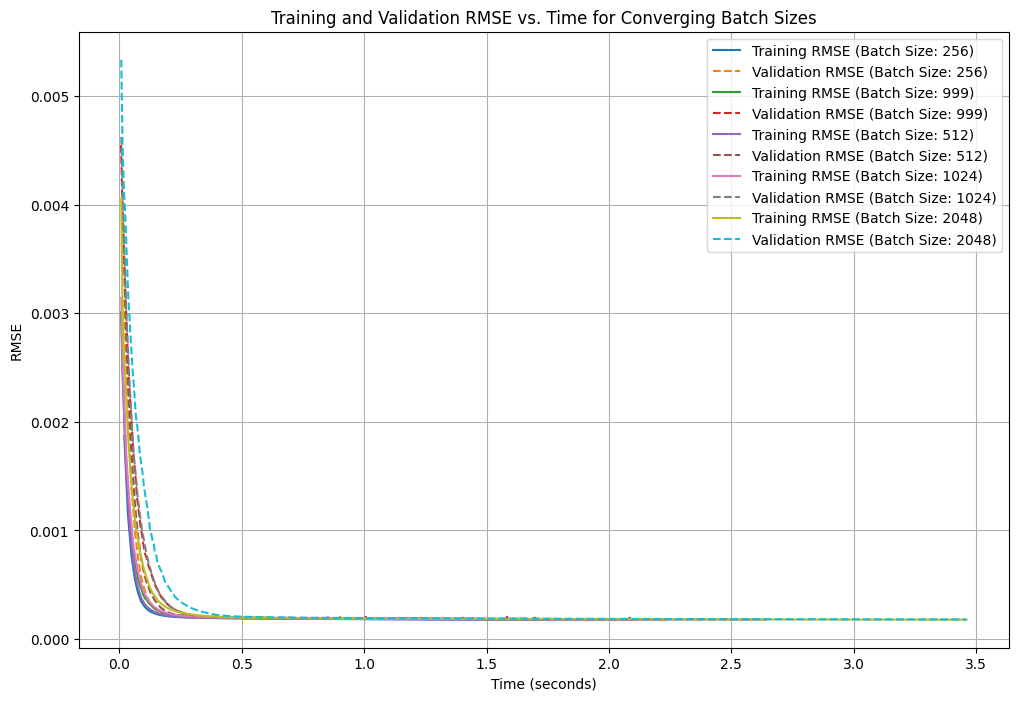

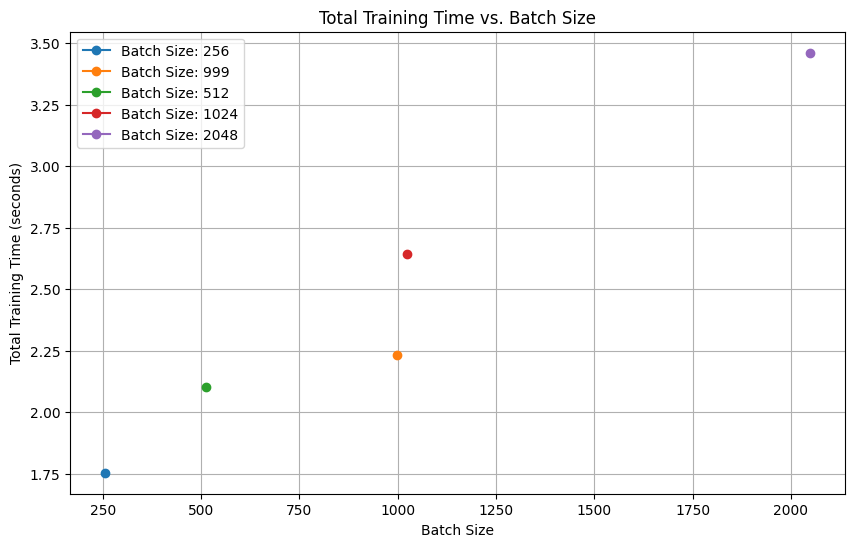

In [122]:
# plot
plot_mini_batch(batch_size_256, batch_size_999, 
                batch_size_512, batch_size_1024, 
                batch_size_2048)

- According to the first graph, all chosen batch size successfully converges. However, the large batch size brings larger epoches, and the validation RMSE converages for more epoch compare to smaller batch size. 
- According to the second graph, we hold the same conclusion as before, where larger batch size takes longer time. 
- According to the last graph, we can see that the larger the batch size, the larger the total time. 


The mean takewaway is that altough there is a trade off in training time and resource comsuption, we can see from the graph, the validation RMSE for larger batch size decrease more smoother indicating less variance between each "step". This suggest us the importance of hyperparameter tunning. Besides, the non-linear trends caused by batch size 999 indicates that finding an optimal batch size can balance between training efficiency and computational cost.  

## Part 5 - Gradient Descent Learning Rate [18 marks]

Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick the first 3 batch sizes that do not converge with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[5]**

2. Select the best batch size based on Part 4's fastest convergence **time** and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD. **[5]**
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[2]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[2]**
  * Describe your findings, including the main takeaways from each of your plots. **[4]**

1.
The first 3 not converge is 2, 32, 48

In [123]:
### YOUR CODE HERE ###
# batch_size = 2
lr_2 = 0.0003
batch_size_2 = mini_batch_gd(x_tra, x_val, y_tra, y_val, batch_size=2, CT=CT, lr=lr_2)
print(f"final weight: {batch_size_2[0]}")
print(f"training RMSE: {batch_size_2[1][:5]}")
print(f"valildation RMSE: {batch_size_2[2][:5]}")
print(f"first 5 training time: {batch_size_2[3][:5]} \
    \nlast 3 training time: {batch_size_2[3][-3:]}")

final weight: [[-8.71849233e-04  4.92272795e-05  5.66182986e-06 -1.30327621e-04
   1.22058476e-05  6.14448068e-05 -8.24251772e-05  2.43091903e-04
  -2.55504239e-05  3.00535225e-05  5.14316496e-06 -1.93204889e-04
  -2.27270145e-04 -3.04201628e-04 -2.35392005e-04  5.27462096e-04
   3.21948863e-04 -3.16792576e-04  3.00424297e-04 -2.41599598e-04
  -1.33296942e-04  3.74152889e-04  2.78156680e-04 -1.96056524e-04
  -3.70148439e-04  6.67356283e-06 -1.81395197e-05  3.01199309e-05
   2.37720433e-06  1.40027712e-05  3.74735118e-06  1.03759246e-05
   1.85494215e-06  1.09917958e-05  3.19046411e-05 -8.80754221e-07
  -1.08784007e-05 -4.87719586e-06 -1.20056609e-06 -1.32973934e-06
   2.01140645e-04]]
training RMSE: [0.0006350777245985996, 0.0003852338146638705, 0.00032613654160591776, 0.0003272108551881405, 0.00028341109318114706]
valildation RMSE: [0.0012335467636583695, 0.0002777878811600492, 0.0005174353870388609, 0.00029319464435305815, 0.0004560045046758412]
first 5 training time: [0.029895305633

In [124]:
# batch_size = 32
# beofe 0.001
lr_32 = 0.001
batch_size_32 = mini_batch_gd(x_tra, x_val, y_tra, y_val, batch_size=32, CT=CT, lr=lr_32)
print(f"final weight: {batch_size_32[0]}")
print(f"training RMSE: {batch_size_32[1][:5]}")
print(f"valildation RMSE: {batch_size_32[2][:5]}")
print(f"first 5 training time: {batch_size_32[3][:5]} \
    \nlast 3 training time: {batch_size_32[3][-3:]}")

final weight: [[-8.72605143e-04  5.21114947e-05  4.96682569e-06 -1.30211454e-04
   6.79480694e-05  6.33682259e-05 -8.46578333e-05  2.63496795e-04
   2.07423390e-05  3.08436112e-05  2.64667269e-05 -2.52887013e-04
  -2.73977808e-04 -3.50942507e-04 -2.61592719e-04  5.00324197e-04
   3.06492653e-04 -3.32248671e-04  3.04262817e-04 -2.37760351e-04
  -1.07110376e-04  4.00845919e-04  3.10281969e-04 -1.64559978e-04
  -3.35251771e-04  1.16548397e-05  4.80744540e-06  3.74449020e-05
   3.53156390e-06  2.10984576e-05  4.11221537e-06  2.39342321e-05
   1.40978295e-06  2.60572703e-05  8.12415401e-06  1.07256435e-05
  -3.86951269e-06  1.48288848e-06  2.70328773e-06  4.13824580e-05
   2.35303009e-04]]
training RMSE: [0.0021095552355015644, 0.0013925521887926731, 0.000977862429666773, 0.0007203407220304788, 0.0005558218767536132]
valildation RMSE: [0.0034786339282493937, 0.0024784816681390656, 0.0018135676683852294, 0.0013596967431925818, 0.0010449461817288463]
first 5 training time: [0.0050065517425537

In [125]:
# batch_size = 48
# before 0.005
lr_48 = 0.005
batch_size_48 = mini_batch_gd(x_tra, x_val, y_tra, y_val, batch_size=48, CT=CT, lr=lr_48)
print(f"final weight: {batch_size_48[0]}")
print(f"training RMSE: {batch_size_48[1][:5]}")
print(f"valildation RMSE: {batch_size_48[2][:5]}")
print(f"first 5 training time: {batch_size_48[3][:5]} \
    \nlast 3 training time: {batch_size_48[3][-3:]}")

final weight: [[-8.72681840e-04  5.06436178e-05  4.53565750e-06 -1.30736939e-04
   5.59258241e-05  6.15182655e-05 -8.41620177e-05  2.59001373e-04
   1.15392644e-05  3.05960641e-05  2.18226711e-05 -2.45802624e-04
  -2.67791214e-04 -3.44755144e-04 -2.58130773e-04  5.04338326e-04
   3.08903443e-04 -3.29837777e-04  3.03784252e-04 -2.38238890e-04
  -1.10695136e-04  3.97169320e-04  3.05644201e-04 -1.68920368e-04
  -3.40336659e-04  1.07049798e-05  4.39355436e-06  3.63942735e-05
   3.58792459e-06  1.97874969e-05  4.02024883e-06  2.27319572e-05
   1.38065280e-06  2.41958244e-05  7.71787279e-06  8.61968736e-06
  -4.55888706e-06 -5.18822405e-07  2.77421576e-06  3.42573176e-05
   2.30505364e-04]]
training RMSE: [0.0008239631187929541, 0.0003863908139473824, 0.00027029872681315413, 0.0002317015566881319, 0.00021583192891450726]
valildation RMSE: [0.0009414986257921663, 0.00040497259783397246, 0.0002957279564680726, 0.0002421108809901837, 0.00021879997334996664]
first 5 training time: [0.00499749183

adjust the previous plot method a little

In [126]:
# plot the graph
def plot_mini_batch_2(*batches):
    batch_list = batches
    
    # train and val RMSE vs. epoch
    plt.figure(figsize=(12, 8))
    for batch in batch_list:
        epoch_arr = range(len(batch[1]))
        rmse_tra_arr = batch[1]
        rmse_val_arr = batch[2]
        lr = batch[-1]
        plt.plot(epoch_arr, rmse_tra_arr, label=f"Training RMSE (lr: {lr})")
        plt.plot(epoch_arr, rmse_val_arr, linestyle="--", label=f"Validation RMSE ( lr: {lr})")
    plt.xlabel("Epoches")
    plt.ylabel("RMSE")
    plt.title("Training and Validation RMSE vs. Epoch for Converging Learning Rates")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # train and val RMSE vs. time
    plt.figure(figsize=(12, 8))
    for batch in batch_list:
        elapse_time_arr = batch[3]
        rmse_tra_arr = batch[1]
        rmse_val_arr = batch[2]
        lr = batch[-1]
        plt.plot(elapse_time_arr, rmse_tra_arr, label=f"Training RMSE (lr: {lr})")
        plt.plot(elapse_time_arr, rmse_val_arr, linestyle='--', label=f"Validation RMSE (lr: {lr})")
    plt.xlabel("Time (seconds)")
    plt.ylabel("RMSE")
    plt.title("Training and Validation RMSE vs. Time for Converging Learning Rates")
    plt.legend()
    plt.grid(True)
    plt.show()    
    
        

In [127]:
# finds in a table
# create dictionary to be converted
data = {
    'batch size': [2, 32, 48],
    'lr': [lr_2, lr_32, lr_48],
    'train RMSE (final)': [batch_size_2[1][-1], batch_size_32[1][-1], batch_size_48[1][-1]],
    'val RMSE (final)': [batch_size_2[2][-1], batch_size_32[2][-1], batch_size_48[2][-1]],
}

# convert to df
table = pd.DataFrame(data)

# display
display(table)

,batch size,lr,train RMSE (final),val RMSE (final)
0,2,0.0003,0.000181,0.000177
1,32,0.0010,0.000178,0.000181
2,48,0.0050,0.000178,0.000180


2.

In [128]:
# fastest time
def fastest_time(*batches):
    fastest = float('inf')
    fastest_time = float('inf')
    
    for batch in batches:
        if batch[3][-1] < fastest_time:
            fastest = batch[4]
            fastest_time = batch[3][-1]

    return fastest
        

In [129]:
fastest_batch = fastest_time(batch_size_256, batch_size_999, 
                batch_size_512, batch_size_1024, 
                batch_size_2048)
print(f"the fastest batch is: {fastest_batch}")

the fastest batch is: 256


10 lrs for batch size 256

In [130]:
lr_256_0 = 0.009
batch_size_256_0 = mini_batch_gd(x_tra, x_val, y_tra, y_val, batch_size=256, CT=CT, lr=lr_256_0)

In [131]:
lr_256_1 = 0.005
batch_size_256_1 = mini_batch_gd(x_tra, x_val, y_tra, y_val, batch_size=256, CT=CT, lr=lr_256_1)

In [132]:
lr_256_2 = 0.003
batch_size_256_2 = mini_batch_gd(x_tra, x_val, y_tra, y_val, batch_size=256, CT=CT, lr=lr_256_2)

In [133]:
lr_256_3 = 0.001
batch_size_256_3 = mini_batch_gd(x_tra, x_val, y_tra, y_val, batch_size=256, CT=CT, lr=lr_256_3)

In [134]:
lr_256_4 = 0.0009
batch_size_256_4 = mini_batch_gd(x_tra, x_val, y_tra, y_val, batch_size=256, CT=CT, lr=lr_256_4)

In [135]:
lr_256_5 = 0.0008
batch_size_256_5 = mini_batch_gd(x_tra, x_val, y_tra, y_val, batch_size=256, CT=CT, lr=lr_256_5)

In [136]:
lr_256_6 = 0.0003
batch_size_256_6 = mini_batch_gd(x_tra, x_val, y_tra, y_val, batch_size=256, CT=CT, lr=lr_256_6)

In [138]:
lr_256_7 = 0.0005
batch_size_256_7 = mini_batch_gd(x_tra, x_val, y_tra, y_val, batch_size=256, CT=CT, lr=lr_256_7)

In [139]:
lr_256_8 = 0.00777
batch_size_256_8 = mini_batch_gd(x_tra, x_val, y_tra, y_val, batch_size=256, CT=CT, lr=lr_256_8)

In [140]:
lr_256_9 = 0.05
batch_size_256_9 = mini_batch_gd(x_tra, x_val, y_tra, y_val, batch_size=256, CT=CT, lr=lr_256_9)

batch size 256 not converging!


In [141]:
lr_256_10 = 0.02
batch_size_256_10 = mini_batch_gd(x_tra, x_val, y_tra, y_val, batch_size=256, CT=CT, lr=lr_256_10)

In [142]:
# add lr at the end of batches for plotting
batch_size_256_0 = batch_size_256_0 + (lr_256_0,)
batch_size_256_1 = batch_size_256_1 + (lr_256_1,)
batch_size_256_2 = batch_size_256_2 + (lr_256_2,)
batch_size_256_3 = batch_size_256_3 + (lr_256_3,)
batch_size_256_4 = batch_size_256_4 + (lr_256_4,)
batch_size_256_5 = batch_size_256_5 + (lr_256_5,)
batch_size_256_6 = batch_size_256_6 + (lr_256_6,)
batch_size_256_7 = batch_size_256_7 + (lr_256_7,)
batch_size_256_8 = batch_size_256_8 + (lr_256_8,)
batch_size_256_10 = batch_size_256_10 + (lr_256_10,)

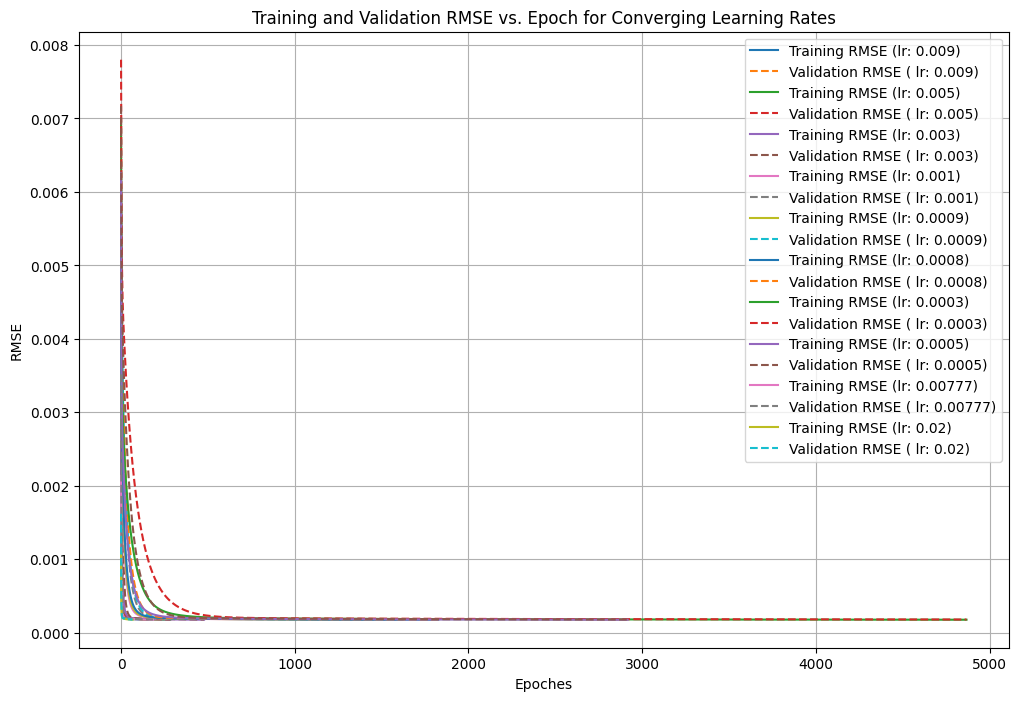

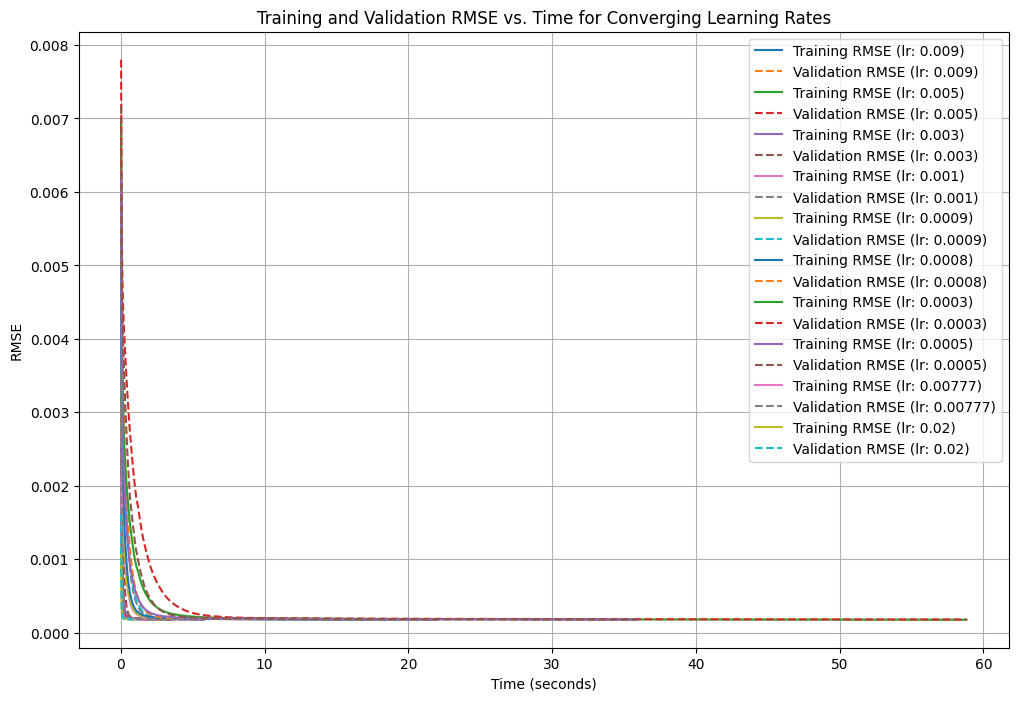

In [143]:
# plot
plot_mini_batch_2(batch_size_256_0, batch_size_256_1, 
                  batch_size_256_2, batch_size_256_3, 
                  batch_size_256_4, batch_size_256_5, 
                  batch_size_256_6, batch_size_256_7, 
                  batch_size_256_8, batch_size_256_10)


- In both graphs, the larger learning rate (lr) bring steeper and faster convergence curve for the model, they converge in quicker time and smaller epoches, where smaller learning rate suggest the opposite. 

The mean take away is that there is a trade off between the convergence speed and RMSE, where larger lr brings faster convergence, but with steeper curve and vice versa. The trade off could caused the variance of the model become too high (for large lr), or takes too much computational time (for small lr). On the other hand, larger lr indicates a large "step" that the model takes each time of looking for minima, which may miss the minima and get start to overfittin, where smaller lr with small "step" maybe too slow or sometimes let us stucked in the local minia.

## Part 6 - Gradient Descent with Additional Features and Regularization [20 marks]

This final part of the project assignment is to be completed independently from Parts 1 - 5. In this part you will be completing some additional coding tasks using a different dataset.

We'll apply linear regresssion to a toy dataset (`LR_data.csv`), with 10 features `x1`-`x10` and a "measurement" `y`. We'll take a few shortcuts by using built-in sklearn functions.

1. Data Preparation **[2]**
  * Print the dataset, and create Numpy arrays with inputs (X) and outputs (y).
  * Split the dataset into training and validation sets (80% training, 20% validation). When splitting, set `random_state=10`.

2. Linear Regression **[3]**
  * Standardize the data using StandardScaler from sklearn.
  * Use the `sklearn.linear_model.LinearRegression` function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to perform linear regression.
  * Print the RMSE for training and validation data.

3. Linear Regression with Additional Features **[5]**
  * Let's add more features to our dataset (degree 8) using `sklearn.preprocessing.PolynomialFeatures` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). You'll want to create the additional features first, then perform standardization (start from non-standardized data).
  * Again, use `sklearn.linear_model.LinearRegression` to perform linear regression.
  * Print the RMSE for training and validation data.

4. Linear Regression with Additional Features and Regularization **[5]**
  * Let's switch models, and instead use the `sklearn.linear_model.Ridge` function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) to perform linear regression with regularization. Apply the model to the processed data (additional, standardized) you used in 3 above. Use a `FOR` loop to run `sklearn.linear_model.Ridge` with different `alpha` values. Specifically, sweep `alpha` from 1E-2 to 1E10 (each step is an order of magnitude jump).

5. Model Evaluation and Conclusion **[5]**
  * Compare the RMSE values from the simple linear regression, polynomial regression and ridge regression models.
  Discuss how the addition of polynomial features and regularization (Ridge) impacted the model's performance on both training and validation sets.
  Determine which model performed the best based on the validation RMSE but without overfitting.



In [52]:
import pandas as pd
df2=pd.read_csv('https://raw.githubusercontent.com/Sabaae/Dataset/main/LR_data.csv' , skipinitialspace=True, index_col=0)

1.

In [53]:
### YOUR CODE HERE ###
df2

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,1.454481,4.940543,7.116015,3.805131,4.105432,1.832290,5.211909,5.088293,3.841250,6.121133,6.575066e+06
1,4.907182,1.653654,7.339445,9.065282,7.169233,2.354136,2.893005,8.720131,8.646473,3.806860,8.419881e+06
2,1.842804,1.183878,4.203206,6.815847,6.655899,8.295816,3.556779,5.794679,3.260723,5.463808,9.745537e+04
3,2.393457,0.094127,3.208929,0.497443,4.318127,4.999247,9.470238,3.061990,7.312995,5.475240,1.129200e+04
4,5.093724,3.905293,4.858562,4.465484,0.947091,9.410307,8.137329,9.043838,9.128607,0.790795,3.105448e+05
...,...,...,...,...,...,...,...,...,...,...,...
195,2.936450,2.094812,9.493814,3.411240,4.350940,0.386062,1.303290,2.699563,7.622569,3.037162,6.599726e+07
196,4.915597,1.953974,7.312552,9.331203,1.329366,8.286760,5.233018,7.476923,7.043560,5.745565,8.176250e+06
197,6.772096,6.406489,4.638352,7.042340,0.912338,7.568296,1.194928,2.592840,9.386478,4.147710,2.144147e+05
198,3.940339,4.330498,6.693371,9.169265,0.858846,0.601942,2.635455,2.037859,7.883720,8.525164,4.028735e+06


In [54]:
X2 = df2.drop(columns=["y"])
y2 = df2["y"]
display(X2)
display(y2)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1.454481,4.940543,7.116015,3.805131,4.105432,1.832290,5.211909,5.088293,3.841250,6.121133
1,4.907182,1.653654,7.339445,9.065282,7.169233,2.354136,2.893005,8.720131,8.646473,3.806860
2,1.842804,1.183878,4.203206,6.815847,6.655899,8.295816,3.556779,5.794679,3.260723,5.463808
3,2.393457,0.094127,3.208929,0.497443,4.318127,4.999247,9.470238,3.061990,7.312995,5.475240
4,5.093724,3.905293,4.858562,4.465484,0.947091,9.410307,8.137329,9.043838,9.128607,0.790795
...,...,...,...,...,...,...,...,...,...,...
195,2.936450,2.094812,9.493814,3.411240,4.350940,0.386062,1.303290,2.699563,7.622569,3.037162
196,4.915597,1.953974,7.312552,9.331203,1.329366,8.286760,5.233018,7.476923,7.043560,5.745565
197,6.772096,6.406489,4.638352,7.042340,0.912338,7.568296,1.194928,2.592840,9.386478,4.147710
198,3.940339,4.330498,6.693371,9.169265,0.858846,0.601942,2.635455,2.037859,7.883720,8.525164


0      6.575066e+06
1      8.419881e+06
2      9.745537e+04
3      1.129200e+04
4      3.105448e+05
           ...     
195    6.599726e+07
196    8.176250e+06
197    2.144147e+05
198    4.028735e+06
199    1.257168e+05
Name: y, Length: 200, dtype: float64

In [55]:
# convert to array
X2 = np.array(X2)
y2 = np.array(y2)
display(X2[:5])
display(y2[:5])
print("Shape of X2:", X2.shape)
print("Shape of y2:", y2.shape)


array([[1.45448096, 4.94054287, 7.11601489, 3.80513094, 4.10543159,
        1.83229024, 5.21190913, 5.08829321, 3.84125023, 6.12113346],
       [4.90718225, 1.65365381, 7.33944456, 9.06528228, 7.16923331,
        2.35413633, 2.89300466, 8.72013079, 8.64647279, 3.80685964],
       [1.84280389, 1.18387834, 4.20320584, 6.81584694, 6.65589886,
        8.29581553, 3.55677861, 5.79467869, 3.26072251, 5.46380776],
       [2.39345678, 0.09412672, 3.20892948, 0.49744307, 4.31812724,
        4.99924742, 9.47023764, 3.06199004, 7.31299514, 5.47523963],
       [5.09372431, 3.90529316, 4.85856216, 4.46548387, 0.94709143,
        9.41030748, 8.13732881, 9.04383796, 9.12860695, 0.79079516]])

array([6575066.40408761, 8419880.76303149,   97455.36981913,
         11291.99815404,  310544.77792694])

Shape of X2: (200, 10)
Shape of y2: (200,)


In [56]:
# split data
X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, test_size=0.2, random_state=10)
display(X2_train[:5], X2_val[:5], y2_train[:5], y2_val[:5])
print("Shape of X2_train:", X2_train.shape)
print("Shape of X2_val:", X2_val.shape)
print("Shape of y2_train:", y2_train.shape)
print("Shape of y2_val:", y2_val.shape)

array([[3.41611827, 9.59211096, 4.55175642, 6.76644557, 2.26884702,
        1.29484759, 0.53714504, 6.93999093, 8.60069024, 4.92063953],
       [1.33811044, 0.58316805, 6.26994194, 9.8648094 , 0.72945151,
        3.91068998, 1.0766019 , 9.20054829, 4.01154992, 9.20611597],
       [4.08399186, 4.60850055, 6.59683366, 7.74386023, 4.19614961,
        3.32940379, 9.73244677, 2.84820571, 0.61422707, 0.95291491],
       [5.02177504, 1.45974874, 0.92337053, 9.03569044, 2.63439423,
        6.02222131, 1.1617408 , 0.44867778, 5.75460912, 2.08240083],
       [4.70572138, 9.7172587 , 0.35263809, 4.14869298, 6.20669517,
        2.56254085, 1.57448286, 9.99203537, 7.45569018, 4.49255739]])

array([[1.38305405, 6.63391268, 2.67327732, 7.15067443, 6.52585963,
        3.39042075, 4.50236947, 6.81533783, 0.70521533, 5.22279   ],
       [0.37595747, 3.48908131, 7.2621063 , 6.30601822, 5.90747174,
        0.98889374, 8.23183476, 8.26577409, 8.66948298, 1.25474254],
       [5.56116087, 8.25842721, 3.54601533, 0.38109843, 4.08140617,
        4.26664435, 3.69800009, 5.01655241, 3.55852895, 1.73775917],
       [3.94033913, 4.3304978 , 6.69337057, 9.16926478, 0.85884606,
        0.60194226, 2.63545488, 2.03785905, 7.88372005, 8.52516391],
       [2.49540073, 1.4742188 , 1.5940114 , 1.31235326, 5.66089328,
        9.97638509, 2.8919286 , 5.82719282, 7.9694982 , 2.19340215]])

array([1.84731874e+05, 2.38844984e+06, 3.58670609e+06, 5.08387236e+01,
       4.61463934e+02])

array([2.77739652e+03, 7.73576381e+06, 2.53313388e+04, 4.02873469e+06,
       4.91481511e+01])

Shape of X2_train: (160, 10)
Shape of X2_val: (40, 10)
Shape of y2_train: (160,)
Shape of y2_val: (40,)


2.

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures


In [58]:
# std the data
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(X2_train)
X2_train_std = scaler.transform(X2_train)
X2_val_std = scaler.transform(X2_val)

In [59]:
# linear regression
model = LinearRegression()
model.fit(X2_train_std, y2_train)

y2_train_pred = model.predict(X2_train_std)
y2_val_pred = model.predict(X2_val_std)


In [60]:
# rmse
rmse_train2 = RMSE(y2_train_pred, y2_train)
rmse_val2 = RMSE(y2_val_pred, y2_val)

print(f'RMSE for training data: {rmse_train2}')
print(f'RMSE for validation data: {rmse_val2}')

RMSE for training data: 15626378.665527359
RMSE for validation data: 16773674.56558643


3.

In [61]:
# create additional feature first
ploy = PolynomialFeatures(degree=8)
X2_train_poly = ploy.fit_transform(X2_train)
X2_val_poly = ploy.transform(X2_val)

In [62]:
# std
X2_train_std_poly = scaler.fit_transform(X2_train_poly)
X2_val_std_poly = scaler.transform(X2_val_poly)

In [63]:
model.fit(X2_train_std_poly, y2_train)

y2_train_poly_pred = model.predict(X2_train_std_poly)
y2_val_poly_pred = model.predict(X2_val_std_poly)

In [64]:
# rmse
rmse_train2_poly = RMSE(y2_train_poly_pred, y2_train)
rmse_val2_poly = RMSE(y2_val_poly_pred, y2_val)

print(f'RMSE for training data: {rmse_train2_poly}')
print(f'RMSE for validation data: {rmse_val2_poly}')

RMSE for training data: 1.1473506111012856e-07
RMSE for validation data: 17568361.78203464


4.

In [65]:
# diff alpha values
alphas = [10**i for i in range(-2, 11)]

# track RMSE with alpha
rmse_with_alpha_train = {}
rmse_with_alpha_val = {}

for alpha in alphas:
    # init model
    ridge = Ridge(alpha=alpha)
    
    ridge.fit(X2_train_std_poly, y2_train)
    
    # pred
    y2_train_pred_ridge = ridge.predict(X2_train_std_poly)
    y2_val_pred_ridge = ridge.predict(X2_val_std_poly)
    
    rmse_train2_ridge = RMSE(y2_train_pred_ridge, y2_train)
    rmse_val2_ridge = RMSE(y2_val_pred_ridge, y2_val)
    
    # store val rmee
    rmse_with_alpha_train[f'{alpha}'] = rmse_train2_ridge
    rmse_with_alpha_val[f'{alpha}'] = rmse_val2_ridge
    
    # print RMSE values
    print(f'Alpha: {alpha}')
    print(f'RMSE for training data: {rmse_train2_ridge}')
    print(f'RMSE for validation data: {rmse_val2_ridge}\n')
    
    

Alpha: 0.01
RMSE for training data: 295.781915151329
RMSE for validation data: 17565699.21614392

Alpha: 0.1
RMSE for training data: 2949.7988306859897
RMSE for validation data: 17543799.859117456

Alpha: 1
RMSE for training data: 28739.15556404496
RMSE for validation data: 17334393.286888298

Alpha: 10
RMSE for training data: 236185.49924874492
RMSE for validation data: 15884880.540646665

Alpha: 100
RMSE for training data: 1100934.2409343533
RMSE for validation data: 12836983.419526083

Alpha: 1000
RMSE for training data: 3183647.23315947
RMSE for validation data: 9513114.605822813

Alpha: 10000
RMSE for training data: 6801380.451473811
RMSE for validation data: 11537463.601570612

Alpha: 100000
RMSE for training data: 13019712.498684278
RMSE for validation data: 16406862.756233372

Alpha: 1000000
RMSE for training data: 18676157.850878913
RMSE for validation data: 21035022.220710576

Alpha: 10000000
RMSE for training data: 21479328.621707976
RMSE for validation data: 24524679.486755

5.

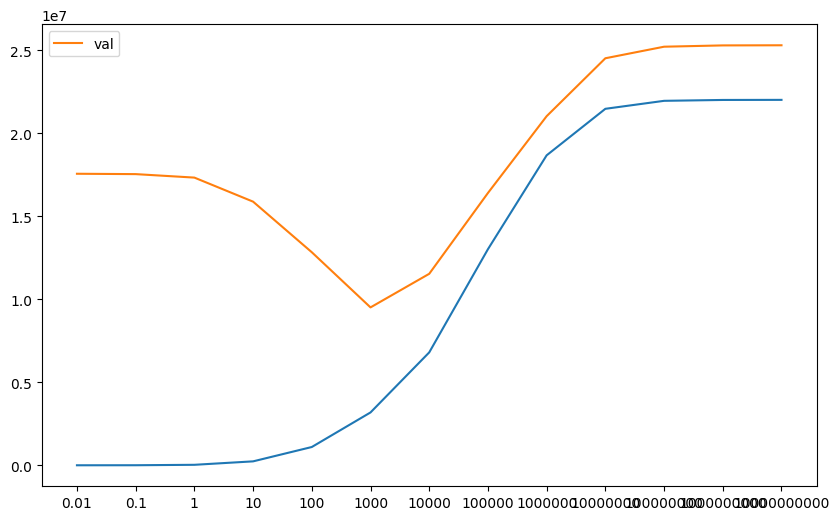

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(rmse_with_alpha_train.keys(), rmse_with_alpha_train.values())
plt.plot(rmse_with_alpha_val.keys(), rmse_with_alpha_val.values(), label="val")
plt.legend()


In [67]:
print("LinearRegression")
print(f'RMSE for training data: {rmse_train2_poly}')
print(f'RMSE for validation data: {rmse_val2_poly}\n')

print("PolynomialFeatures")
print(f'RMSE for training data: {rmse_train2_poly}')
print(f'RMSE for validation data: {rmse_val2_poly}\n')

print("Ridge")
print(f"alpha {1000}, rmse train: {rmse_with_alpha_train['1000']}")
print(f"alpha {1000}, rmse val: {rmse_with_alpha_val['1000']}")

LinearRegression
RMSE for training data: 1.1473506111012856e-07
RMSE for validation data: 17568361.78203464

PolynomialFeatures
RMSE for training data: 1.1473506111012856e-07
RMSE for validation data: 17568361.78203464

Ridge
alpha 1000, rmse train: 3183647.23315947
alpha 1000, rmse val: 9513114.605822813


- We can see the RMSE for both training and validation for all three models above, where for Ridge, I picked the best alpha value before overfitting. Based on the data, `Simple Linear Regression` and `Polynomial Regression` without regularization both suffered from overfitting. The training RMSE is really low, and the validation RMSE is very high. 
- Based on the data of `Polynomial Features`, we can analyse that add features without regularization would bring us overfitted model. Polynomial features introduce more parameters as their degree increases, which increases the risk of the model fitting not only the true patterns but also the noise in the training set.
- Where `Ridge Model` applied regularization on the additional features, despite still high validation rmse, it obtains lower rmse validation compare to the rest two.
- The best performing model is Ridge model with alpha `1000`, with the lowest validation RMSE `9513114` ish

In [1]:
!jupyter nbconvert --to script F24_MIE370_Project_3.ipynb

[NbConvertApp] Converting notebook F24_MIE370_Project_3.ipynb to script
[NbConvertApp] Writing 98120 bytes to F24_MIE370_Project_3.py
